In [2]:
from scipy.integrate import solve_ivp
from matplotlib.pyplot import subplots
from numpy import linspace, around, var, ndarray
from scipy.signal import find_peaks

In [3]:
def plot_bifdiagram(results_min_f, results_max_f, 
                    par_set):
    
    N = len(results_min_f)

    fig, ax = subplots(figsize=(6, 4))

    for xe, ye in zip(par_set, results_max_f[0]):

        if not isinstance(ye, ndarray):
            ax.scatter(xe, ye, c='k', s=6, marker='D')
        else:
            ax.scatter([xe] * len(ye), ye, s=3, c='r', marker='D')

    for xe, ye in zip(par_set, results_min_f[0]):

        if not isinstance(ye, ndarray):
            ax.scatter(xe, ye, c='gray', s=6, marker='d')
        else:
            ax.scatter([xe] * len(ye), ye, s=3, c='b', marker='d')


    ax.set_xticks(linspace(par_set[0], par_set[-1], 5));
    ax.set_xticklabels(around(linspace(par_set[0], par_set[-1], 5), 2), fontsize=16);
    ax.set_xlabel('Parameter', fontsize=16)

    ax.set_ylabel('EX', fontsize=14)

    y_min, y_max = ax.get_ylim()

    ax.set_yticks(linspace(y_min, y_max, 3));
    ax.set_yticklabels(around(linspace(y_min, y_max, 3),2), fontsize=14);

    fig.tight_layout()
    
    return fig, ax

# Model of Feedforward inhibition combined with feedback inhibition


## Time Series

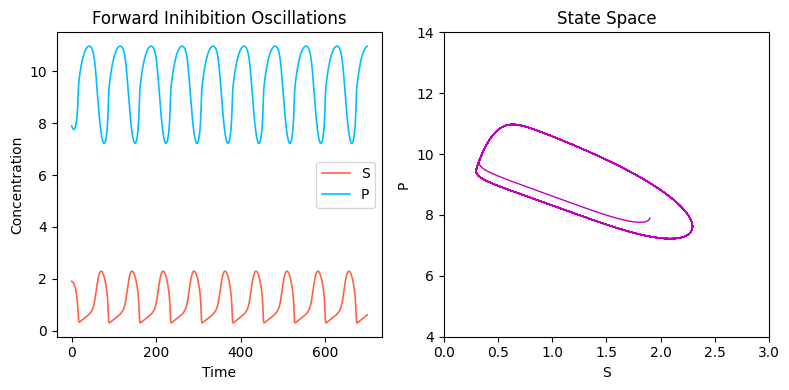

In [8]:
def model(t, variables, a1, b1, a2, b2, k_max, K_m, k_i, n, m, q):
    """Coupled system with feedback inhibition"""
    S, P = variables
    
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m) / (1 + k_i * P**q)
    
    dSdt = a1 - b1 * S - enzymatic_rate
    dPdt = a2 - b2 * P + enzymatic_rate
    
    return [dSdt, dPdt]


S_0 = 2.5
P_0 = 0.6 

y0 = [S_0, P_0]
y0 = [1.9, 7.9]

b1, b2  = 0.18, 0.05
a1, a2  = 0.66, 0.02
k_max, K_m, k_i = 25.0, 0.7, 0.06
n, m, q = 1, 3, 2.8


t_span = (0, 700)

solution = solve_ivp(model, t_span, y0, args=(a1, b1, a2, b2, k_max, K_m, k_i, n, m, q,), method='BDF', max_step=0.1)

t = solution.t

S = solution.y[0]
P = solution.y[1]

fig, ax = subplots(ncols=2, figsize=(8, 4))

ax[0].plot(t, S, label='S', linewidth=1.2, color='tomato')
ax[0].plot(t, P, label='P', linewidth=1.2, color='deepskyblue')

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Concentration')
ax[0].legend()
ax[0].set_title('Forward Inihibition Oscillations')

ax[1].plot(S, P, linewidth=1, color='m');
# ax[1].plot(c2[:300], c3[:300], linewidth=1, color='k');
ax[1].set_xlabel('S')
ax[1].set_ylabel('P')
ax[1].set_title('State Space')
ax[1].set_xlim(0, 3)
ax[1].set_ylim(4, 14)


fig.tight_layout()

In [10]:
around((S[-1], P[-1]), 2)


array([1.84, 8.62])

## State Space Nullclines

NULLCLINE ANALYSIS FOR OSCILLATORY SYSTEM
b1=0.18, b2=0.05
a1=0.649, a2=0.02
k_max=25.0, K_m=0.7
k_i=0.06
n=1, m=3, q=2.8

Computing S-nullcline...
Computing P-nullcline...
Finding fixed points...
Found 0 fixed point(s):
Adding limit cycle from simulation...


/var/folders/cs/lkcj7j890kv6kfxbkl56w9h80000gn/T/ipykernel_18892/3488120556.py:23: RuntimeWarning:

invalid value encountered in scalar power

/var/folders/cs/lkcj7j890kv6kfxbkl56w9h80000gn/T/ipykernel_18892/3488120556.py:134: RuntimeWarning:

The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.



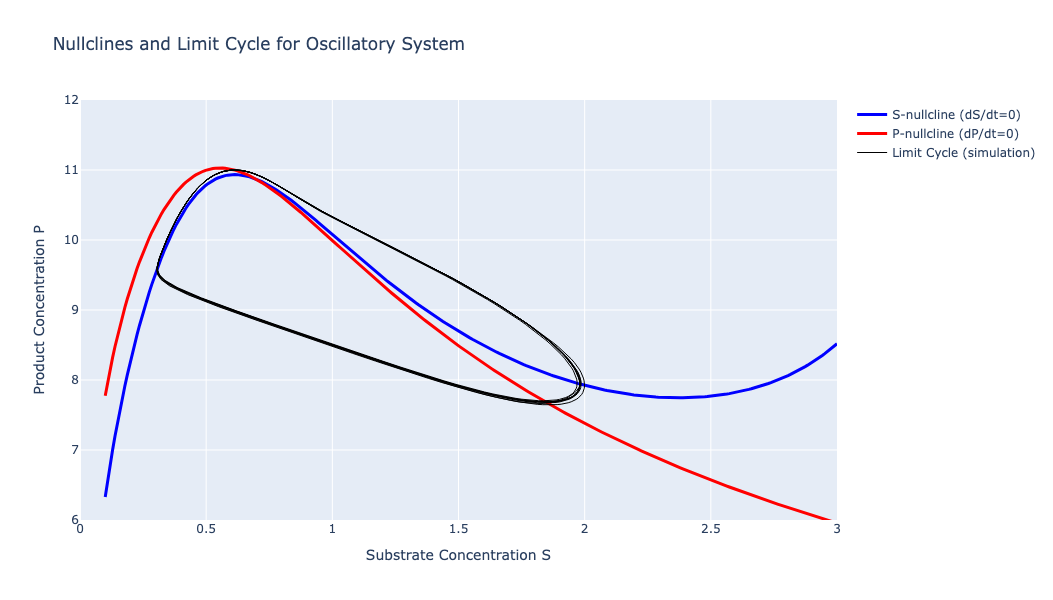


MATHEMATICAL ANALYSIS
Nullcline equations:
S-nullcline: a₁ - b₁·S = k_max·S/(K_m³ + S³) · 1/(1 + k_i·P²)
P-nullcline: a₂ - b₂·P = -k_max·S/(K_m³ + S³) · 1/(1 + k_i·P²)

Rearranged:
S-nullcline: P = √[(k_max·S/((a₁ - b₁·S)(K_m³ + S³)) - 1)/k_i]
P-nullcline: P = [a₂ + k_max·S/((K_m³ + S³)(1 + k_i·P²))]/b₂


The purple limit cycle shows sustained oscillations around the fixed point!


In [23]:
import numpy as np
import plotly.graph_objects as go
from scipy.optimize import fsolve

# Your oscillatory parameters
# b1, b2 = 0.18, 0.05
# a1, a2 = 0.62, 0.03
# k_max, K_m = 4.5, 0.9
# k_i = 0.06
# n, m, q = 1, 3, 2

print("NULLCLINE ANALYSIS FOR OSCILLATORY SYSTEM")
print("="*50)
print(f"b1={b1}, b2={b2}")
print(f"a1={a1}, a2={a2}")
print(f"k_max={k_max}, K_m={K_m}")
print(f"k_i={k_i}")
print(f"n={n}, m={m}, q={q}")
print()

def enzymatic_rate(S, P):
    """Enzymatic rate with forward and feedback inhibition"""
    return (k_max * S**n) / (K_m**m + S**m) / (1 + k_i * P**q)

def S_nullcline(S, P):
    """S-nullcline: dS/dt = 0 => a1 - b1*S = v(S,P)"""
    return a1 - b1*S - enzymatic_rate(S, P)

def P_nullcline(S, P):
    """P-nullcline: dP/dt = 0 => a2 - b2*P = -v(S,P)"""
    return a2 - b2*P + enzymatic_rate(S, P)

# Compute S-nullcline: For each S, find P such that dS/dt = 0
print("Computing S-nullcline...")
S_values = np.linspace(0.1, 3, 300)
P_S_null = []

for S in S_values:
    def equation(P):
        return S_nullcline(S, P)
    
    try:
        # Try multiple initial guesses
        solutions = []
        for P_guess in [5.0, 6.0, 7.0, 8.0]:
            result = fsolve(equation, P_guess)
            if (result[0] > 0 and result[0] < 15 and 
                abs(equation(result[0])) < 1e-6):
                solutions.append(result[0])
        
        # Remove duplicates and take the first valid solution
        if solutions:
            unique_solutions = []
            for sol in solutions:
                if not any(abs(sol - existing) < 0.1 for existing in unique_solutions):
                    unique_solutions.append(sol)
            P_S_null.append(unique_solutions[0])  # Take first branch for plotting
        else:
            P_S_null.append(np.nan)
    except:
        P_S_null.append(np.nan)

# Compute P-nullcline: For each S, find P such that dP/dt = 0
print("Computing P-nullcline...")
P_P_null = []

for S in S_values:
    def equation(P):
        return P_nullcline(S, P)
    
    try:
        # Try multiple initial guesses
        solutions = []
        for P_guess in [0.1, 1.0, 3.0, 5.0]:
            result = fsolve(equation, P_guess)
            if (result[0] > 0 and result[0] < 15 and 
                abs(equation(result[0])) < 1e-6):
                solutions.append(result[0])
        
        # Remove duplicates and take the first valid solution
        if solutions:
            unique_solutions = []
            for sol in solutions:
                if not any(abs(sol - existing) < 0.1 for existing in unique_solutions):
                    unique_solutions.append(sol)
            P_P_null.append(unique_solutions[0])  # Take first branch for plotting
        else:
            P_P_null.append(np.nan)
    except:
        P_P_null.append(np.nan)

# Create the phase portrait
fig = go.Figure()

# Plot S-nullcline
valid_S_S = []
valid_P_S = []
for S, P in zip(S_values, P_S_null):
    if not np.isnan(P):
        valid_S_S.append(S)
        valid_P_S.append(P)

fig.add_trace(go.Scatter(x=valid_S_S, y=valid_P_S, mode='lines',
                        name='S-nullcline (dS/dt=0)',
                        line=dict(color='blue', width=3)))

# Plot P-nullcline
valid_S_P = []
valid_P_P = []
for S, P in zip(S_values, P_P_null):
    if not np.isnan(P):
        valid_S_P.append(S)
        valid_P_P.append(P)

fig.add_trace(go.Scatter(x=valid_S_P, y=valid_P_P, mode='lines',
                        name='P-nullcline (dP/dt=0)',
                        line=dict(color='red', width=3)))

# Find fixed points (intersections)
print("Finding fixed points...")
fixed_points = []

# Search in S-P space
S_search = np.linspace(0.1, 3, 50)
P_search = np.linspace(0.1, 5, 50)

for S_guess in S_search:
    for P_guess in P_search:
        def equations(vars):
            S, P = vars
            return [S_nullcline(S, P), P_nullcline(S, P)]
        
        try:
            result = fsolve(equations, [S_guess, P_guess])
            S_sol, P_sol = result
            
            # Check if valid solution
            residuals = equations([S_sol, P_sol])
            if (np.linalg.norm(residuals) < 1e-6 and 
                S_sol > 0 and P_sol > 0 and 
                S_sol <= 5 and P_sol <= 5):
                
                # Check if new
                is_new = True
                for existing in fixed_points:
                    if (abs(S_sol - existing[0]) < 0.1 and 
                        abs(P_sol - existing[1]) < 0.1):
                        is_new = False
                        break
                
                if is_new:
                    fixed_points.append((S_sol, P_sol))
        except:
            continue

print(f"Found {len(fixed_points)} fixed point(s):")
for i, (S, P) in enumerate(fixed_points):
    print(f"  FP{i+1}: S = {S:.3f}, P = {P:.3f}")

# Plot fixed points
for i, (S, P) in enumerate(fixed_points):
    fig.add_trace(go.Scatter(x=[S], y=[P], mode='markers',
                            marker=dict(size=15, color='green', symbol='circle',
                                      line=dict(width=1, color='black')),
                            name=f'Fixed Point {i+1}'))

# Add a limit cycle from simulation to show oscillations
print("Adding limit cycle from simulation...")
from scipy.integrate import solve_ivp

def system_dynamics(t, variables):
    S, P = variables
    rate = enzymatic_rate(S, P)
    dSdt = a1 - b1*S - rate
    dPdt = a2 - b2*P + rate
    return [dSdt, dPdt]

# Simulate to get limit cycle
sol = solve_ivp(system_dynamics, (0, 2000), [1.0, 1.0],
                t_eval=np.linspace(0, 2000, 5000), method='RK45')

# Use only the last part to avoid transients
S_cycle = sol.y[0][-2000:]
P_cycle = sol.y[1][-2000:]

fig.add_trace(go.Scatter(x=S_cycle, y=P_cycle, mode='lines',
                        name='Limit Cycle (simulation)',
                        line=dict(color='black', width=1)))

# Update layout
fig.update_layout(
    title="Nullclines and Limit Cycle for Oscillatory System",
    xaxis_title="Substrate Concentration S",
    yaxis_title="Product Concentration P", 
    width=700,
    height=600,
    showlegend=True
)

fig.update_xaxes(range=[0, 3])
fig.update_yaxes(range=[6, 12])

fig.show()

# Mathematical analysis
print("\n" + "="*50)
print("MATHEMATICAL ANALYSIS")
print("="*50)

print("Nullcline equations:")
print("S-nullcline: a₁ - b₁·S = k_max·S/(K_m³ + S³) · 1/(1 + k_i·P²)")
print("P-nullcline: a₂ - b₂·P = -k_max·S/(K_m³ + S³) · 1/(1 + k_i·P²)")
print()
print("Rearranged:")
print("S-nullcline: P = √[(k_max·S/((a₁ - b₁·S)(K_m³ + S³)) - 1)/k_i]")
print("P-nullcline: P = [a₂ + k_max·S/((K_m³ + S³)(1 + k_i·P²))]/b₂")
print()

if len(fixed_points) == 1:
    S_fp, P_fp = fixed_points[0]
    print(f"Single fixed point at: S = {S_fp:.3f}, P = {P_fp:.3f}")
    print("This is typical for oscillatory systems - an unstable fixed point")
    print("surrounded by a stable limit cycle!")
    
    # Check stability roughly by simulating nearby
    sol_test = solve_ivp(system_dynamics, (0, 50), [S_fp + 0.1, P_fp + 0.1],
                        t_eval=[0, 50], method='RK45')
    final_S, final_P = sol_test.y[0, -1], sol_test.y[1, -1]
    distance = np.sqrt((final_S - S_fp)**2 + (final_P - P_fp)**2)
    
    if distance > 0.5:
        print("Fixed point appears UNSTABLE (spiral source)")
    else:
        print("Fixed point appears STABLE")

print("\nThe purple limit cycle shows sustained oscillations around the fixed point!")

## Bifurcation Diagram

In [20]:
# Bifurcation parameter set
par_min, par_max, steps = 0.60, 0.67, 50
# par_min, par_max, steps = 0.67, 0.60, 50

par_set = linspace(par_min, par_max, steps)

# Time array
t_span = (0, 500)

results_min_f      = dict()
results_min_inds_f = dict()
results_max_f      = dict()
results_max_inds_f = dict()

# Simulation "forward"
for par in par_set:

    solution = solve_ivp(model, t_span, y0, args=(par, b1, a2, b2, k_max, K_m, k_i, n, m, q,), method='BDF', max_step=0.1)

    S = solution.y[0]
    P = solution.y[1]

    rows = S.size//2

    series = S[rows//2:]

    num = 0
                
    if var(series) < 0.001:

        if num not in results_min_f:
            
            results_min_f[num]      = [series[-1]]
            results_min_inds_f[num] = [0]    
           
        else:
            results_min_f[num].append(series[-1])
            results_min_inds_f[num].append(0)    

        if num not in results_max_f:
            
            results_max_f[num]      = [series[-1]]
            results_max_inds_f[num] = [0]    
           
        else:
            results_max_f[num].append(series[-1])
            results_max_inds_f[num].append(0)    

    else:
        
        y_f_max_inds = find_peaks(series, distance=100)
        y_f_maxs     = series[y_f_max_inds[0]]

        y_f_min_inds = find_peaks(-series, distance=100)
        y_f_mins     = series[y_f_min_inds[0]]

        if num not in results_min_f:

            results_min_f[num]      = [y_f_mins]
            results_min_inds_f[num] = [y_f_min_inds]
            
            results_max_f[num]      = [y_f_maxs]
            results_max_inds_f[num] = [y_f_max_inds]

        else:

            results_min_f[num].append(y_f_mins)
            results_min_inds_f[num].append(y_f_min_inds)
            
            results_max_f[num].append(y_f_maxs)
            results_max_inds_f[num].append(y_f_max_inds)


    if par != par_set[-1]:
        
        y0 = solution.y[:, -1]

print('')
print('Scan complete!', list(around(solution.y[:, -1],3)))
print('')


Scan complete! [np.float64(2.22), np.float64(6.008)]



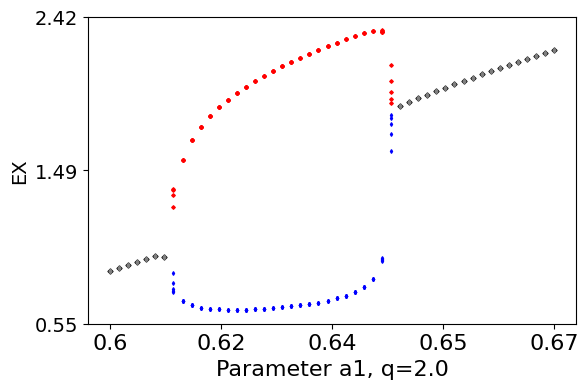

In [21]:
fig, ax = plot_bifdiagram(results_min_f, results_max_f, par_set)
    
ax.set_xlabel('Parameter a1, q=2.0', fontsize=16);

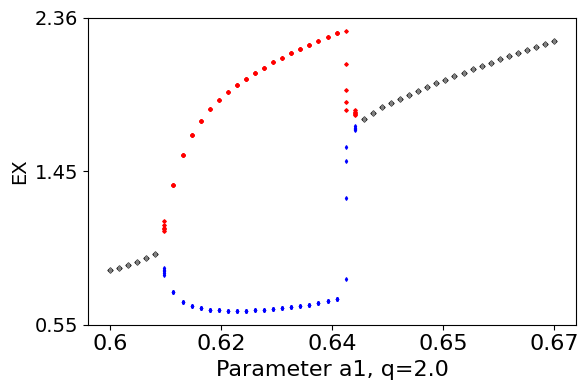

In [16]:
fig, ax = plot_bifdiagram(results_min_f, results_max_f, par_set)
    
ax.set_xlabel('Parameter a1, q=2.0', fontsize=16);